# MAT281 - Laboratorios N°07

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

# Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

Text(0.5, 1.0, 'Grupo 4')

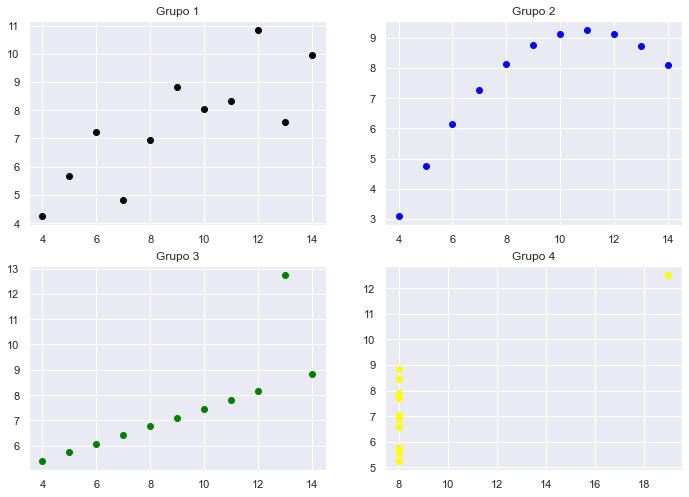

In [3]:
g1= df[df['grupo'] == 'Grupo_1']   
g2= df[df['grupo'] == 'Grupo_2']   
g3= df[df['grupo'] == 'Grupo_3']   
g4= df[df['grupo'] == 'Grupo_4']

plt.subplot(221)
plt.scatter(g1['x'],g1['y'],color='black')
plt.title('Grupo 1')

plt.subplot(222)
plt.scatter(g2['x'],g2['y'],color='blue')
plt.title('Grupo 2')

plt.subplot(223)
plt.scatter(g3['x'],g3['y'],color='green')
plt.title('Grupo 3')

plt.subplot(224)
g_y4=plt.scatter(g4['x'],g4['y'],color='yellow')
plt.title('Grupo 4')

dados los graficos, los grupos son muy diferentes entre si.

# Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.

In [4]:
for i in range(1,5):
    i = 'Grupo_'+str(i)
    print(i)
    print(df.loc[df['grupo']== i].describe())
    print()

Grupo_1
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000

Grupo_2
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000

Grupo_3
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000

Grupo_4
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000

Todos los grupos presentan medidas de tendencia central muy similares, a pesar de lo distintos que son los graficos de cada uno.

#  Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

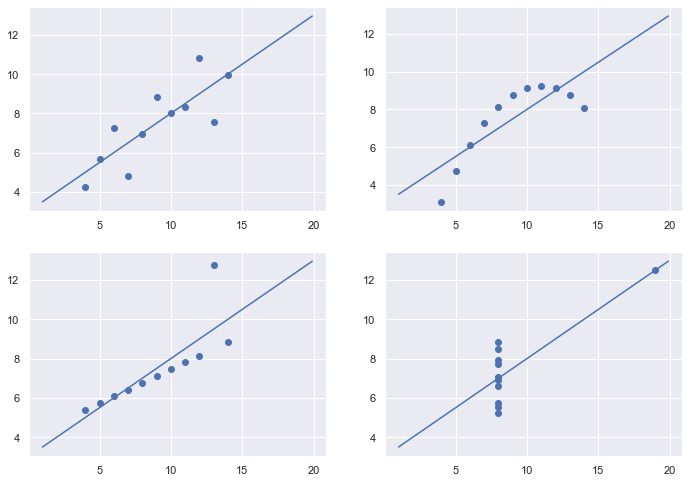

In [5]:
from sklearn.linear_model import LinearRegression
list=[[g1['x'],g1['y']],[g2['x'],g2['y']],[g3['x'],g3['y']],[g4['x'],g4['y']]]
model_rl = LinearRegression() # Creando el modelo.
for i in range(0,4):
    model_rl.fit(pd.DataFrame(list[i][0]),pd.DataFrame(list[i][1]))
    beta_0 = model_rl.intercept_
    beta_1 = model_rl.coef_[0]
    
    plt.subplot(2,2,i+1)
    plt.scatter(list[i][0],list[i][1])
    x_range = np.arange(1,20,0.1)
    plt.plot(x_range,beta_0+beta_1*x_range)

Los grupos 1 y 3 presentan concordancia con el ajuste lineal, sin mebargo el grupo 2, se parece a una parabola y el grupo 4 a una lineal vertical, por lo que el ajuste no es adecuado a estos grupos. 

# Calcule los resultados de las métricas para cada grupo. Interprete.

In [6]:
# Grupo 1
from metrics_regression import *
from sklearn.metrics import r2_score

lista=[]
for i in model_rl.predict(pd.DataFrame(g1['x'])).tolist():
    lista.append(i[0])
lista
df_temp = pd.DataFrame({'y':g1['y'],'yhat': lista})

df_metrics = summary_metrics(df_temp)
print('\nMetricas para el grupo 1:\n')
print(df_metrics)


Metricas para el grupo 1:

      mae     mse    rmse    mape  maape   wmape   mmape   smape
0  0.8373  1.2512  1.1185  0.1213  0.119  0.1116  0.1048  0.1167


In [7]:
#Grupo 2

lista=[]
for i in model_rl.predict(pd.DataFrame(g2['x'])).tolist():
    lista.append(i[0])
lista
df_temp = pd.DataFrame({'y':g2['y'],'yhat': lista})
df_metrics = summary_metrics(df_temp)
print('\nMetricas para el grupo 2:\n')
print(df_metrics)


Metricas para el grupo 2:

      mae     mse    rmse   mape   maape  wmape   mmape   smape
0  0.9679  1.2524  1.1191  0.157  0.1504  0.129  0.1315  0.1438


In [8]:
#Grupo 3

lista=[]
for i in model_rl.predict(pd.DataFrame(g3['x'])).tolist():
    lista.append(i[0])
lista 
df_temp = pd.DataFrame({'y':g3['y'],'yhat': lista})
df_metrics = summary_metrics(df_temp)
print('\nMetricas para el grupo 3:\n')
print(df_metrics)


Metricas para el grupo 3:

      mae     mse    rmse    mape   maape   wmape   mmape   smape
0  0.7165  1.2506  1.1183  0.0798  0.0791  0.0955  0.0713  0.0815


In [9]:
#Grupo 4

lista=[]
for i in model_rl.predict(pd.DataFrame(g4['x'])).tolist():
    lista.append(i[0])
lista 
df_temp = pd.DataFrame({'y':g4['y'],'yhat': lista})
df_metrics = summary_metrics(df_temp)
print('\nMetricas para el grupo 4:\n')
print(df_metrics)


Metricas para el grupo 4:

      mae     mse    rmse    mape   maape   wmape   mmape   smape
0  0.9027  1.2493  1.1177  0.1347  0.1324  0.1203  0.1167  0.1303


Con respecto al grupo 1, los errores porcentuales son cercanos al 10% por lo que el modelo lineal se ajusta de buena forma a los datos. El grupo 2, tiene errores porcentuales cercanos al 15%, lo que sugiere que quizas una recta no sea el mejor modelo. Por otro lado, el grupo 3, tiene errores porcentuales muy bajos, cercanos a 7%, esto puede significar que si bien los datos siguen una tendencia lineal, debe haber algún outlier que haya afectado el corrrecto ajuste de la recta. Finalmente, el grupo 4, tiene errores relativamente grandes, por lo que la tendencia lineal no es un buen ajuste a los datos

# Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario. 

Debido a que el grupo 1, no presenta ningun ajuste parecido a un modelo previo, se concluye, por los datos obtenidos anteriormente, el ajuste lineal realizado es el mejor para ese caso. Por otro lado, el grupo 3 y 4 se eliminaron los datos los cuales desajustan el modelo y se realizo un ajuste adecuado, para el grupo 3 simplemente se eliminaron los datos outliers y se mantuvo el ajuste.

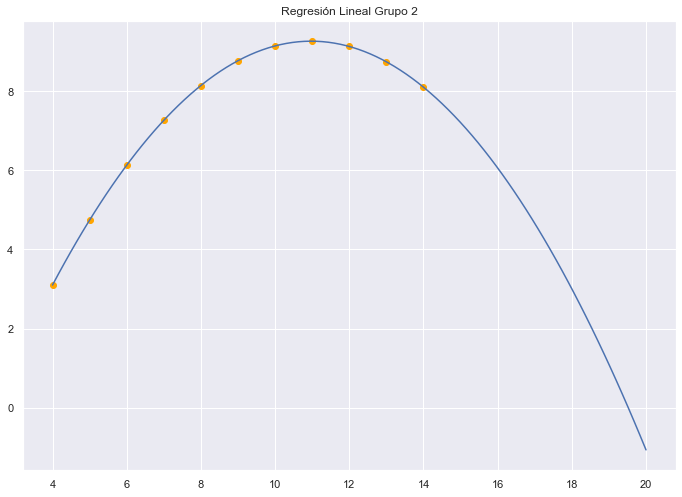

0.999999457857722

In [10]:
#Ajuste grupo 2

import numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

data= df.loc[df["grupo"]=="Grupo_2"]
X = data[["x"]] 
y = data[["y"]]

X = data.x 
y = data.y
mymodel = numpy.poly1d(numpy.polyfit(X, y, 2))

myline = numpy.linspace(4, 20, 100)

plt.title('Regresión Lineal Grupo 2')
plt.scatter(X, y,color="orange")
plt.plot(myline, mymodel(myline))
plt.show()


r2_score(y, mymodel(X))

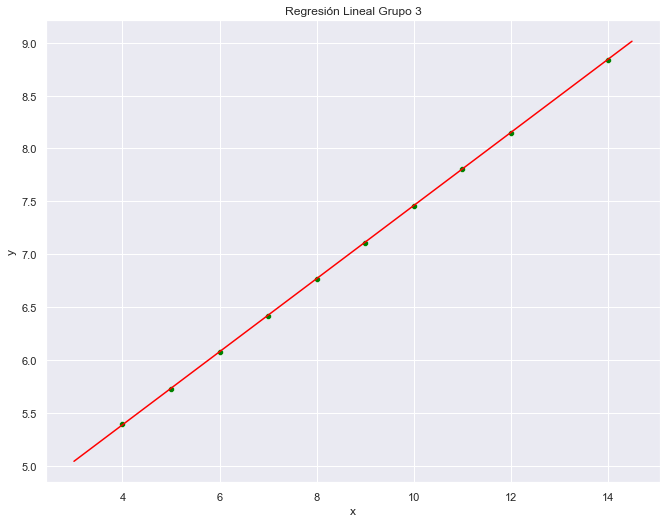

0.999993107581533

In [11]:
#Ajuste grupo 3

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# import some data to play with
data= df.loc[df["grupo"]=="Grupo_3"]
mask=data["y"]<12 ##elimina outlaier
data= data[mask]
X = data[["x"]]
y = data[["y"]]

model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X, y) 
# graficos con seaborn

beta_0 = model_rl.intercept_[0]
beta_1 = model_rl.coef_[0]

x_range = np.arange(3,15,0.5)

df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1[0]*n for n in x_range]})

df2 = pd.DataFrame({'x':X['x'],'y_true':y['y']})

fig, ax = plt.subplots(figsize=(11, 8.5))


sns.scatterplot(x='x', y='y_true', data=df2, ax=ax,color="green")
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.title('Regresión Lineal Grupo 3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

y_pred = model_rl.predict(X)

r2_score(y, y_pred)

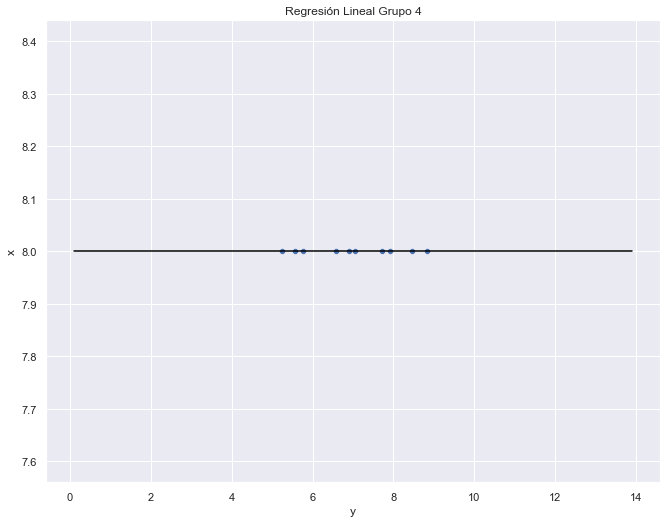

In [12]:
#Grupo4
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data= df.loc[df["grupo"]=="Grupo_4"]
mask=data["y"]<12 ##elimina outlaier
data= data[mask]
X = g4[['y']].drop(40,axis=0) # we only take the first two features.
y = g4['x'].drop(40,axis=0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rl = LinearRegression()
model_rl.fit(X_train, y_train)

x_range = np.arange(0.1,14,0.1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[model_rl.intercept_+ model_rl.coef_[0]*n for n in x_range]})
  
df = pd.DataFrame({'x':X['y'],'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="black")

plt.title('Regresión Lineal Grupo 4')
plt.xlabel('y')
plt.ylabel('x')
plt.show()

# grafico rotado para una mejor visualización.